#CSC 820
Homework 8  
Andrew Dahlstrom  
4/3/2024  

In [1]:
# Import necessary libraries to get started
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Initial file paths remember to update the path to your local repository
train = '../content/drive/MyDrive/Colab Notebooks/CSC 820/Corona_NLP_train.csv'
test = '../content/drive/MyDrive/Colab Notebooks/CSC 820/Corona_NLP_test.csv'

# A copy of the files is preserved in order to retain an original structure which won't be affected by
# the data processings.
trainOriginal = pd.read_csv(train, encoding='latin-1')
testOriginal = pd.read_csv(test, encoding='latin-1')

# Earlier attempts to open the files with a utf-8 encoding lead to a unicode error as it couldn't
# parse certain parts of the file, hence, utf-8 was introduced as a solution.
train = trainOriginal.copy()
test = testOriginal.copy()

In [3]:
# The datasets contain 7 columns housing the data info. The UserName and ScreenName has being
# encrypted due to privacy concerns. The tweets contains mentions and hashtags which must be cleaned
# in order to help the models better understand the statistical relationship between the relevant
# details. The sentiment column contains 5 different classes which can be remapped into 3 for better
# statistical understanding. The other columns are the timeframe of the tweets and the location from
# where the tweets where twitted.

# Display first 4 rows of training dataframe
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
# Display first 4 rows of testing dataframe
test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [5]:
# The datas that will have the major effects on how the models determine the classes are non integers
# which means data preprocessing steps needs to be don before feeding them into the models.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [6]:
# The location column contains a whooping 8590 missing rows. Filling the blanks with the most common
# location won't really make sense as the missing details are too much.
train.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [7]:
# The location info was splitted and merged because lots of the locations are in the same geolocation,
# The datasets also shows a great reprentative bias. For a global distortion, the bulk of the data
# collected are within few geopolitical zones with Africa having a little representation. Different
# ideals, govermental polices, religious beliefs etc are factors that likely influenced the sentiment
# class of individual tweets.
train['Location'].value_counts()[:60]

Location
London                     540
United States              528
London, England            520
New York, NY               395
Washington, DC             373
United Kingdom             337
Los Angeles, CA            281
India                      268
UK                         232
Australia                  225
USA                        223
Canada                     191
England, United Kingdom    191
Toronto, Ontario           160
Global                     159
Chicago, IL                155
California, USA            153
San Francisco, CA          152
Boston, MA                 150
New York, USA              140
New Delhi, India           138
Atlanta, GA                126
New York                   126
Mumbai, India              109
Worldwide                  101
Lagos, Nigeria              99
Houston, TX                 98
Austin, TX                  98
Texas, USA                  98
London, UK                  96
Toronto                     91
Los Angeles                 89

In [9]:
# Splitting location into word pairs
train['Location'] = train['Location'].str.split(",").str[0]
test['Location'] = test['Location'].str.split(",").str[0]
train['Location'].value_counts()[:60]

Location
London            1247
New York           709
United States      530
Washington         504
Los Angeles        402
Toronto            346
United Kingdom     342
India              276
Chicago            262
England            255
UK                 246
USA                231
Australia          230
California         211
San Francisco      206
Sydney             202
New Delhi          201
Melbourne          199
Canada             198
Mumbai             197
Boston             197
Atlanta            165
Global             159
Houston            156
Texas              145
Lagos              136
Austin             130
Florida            121
Seattle            120
Nairobi            117
Dallas             115
Philadelphia       114
Manchester         111
Vancouver          106
Scotland           104
New Jersey         103
Worldwide          101
San Diego           99
New York City       95
Dubai               91
Singapore           88
South Africa        87
Portland            86
De

In [10]:
# The data collected was tweeted between 16th March, 2020 to 14th April, 2020. Any model built and
# deployed at this time may likely not be relevant for present use due to new findings, researches,
# tresnd that have emerged which will influence every recent covid19 related tweets. Any model built
# using this data will be a decayed model and further decay will happen at a rapid pace.
train['TweetAt'].value_counts()

TweetAt
20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: count, dtype: int64

In [11]:
# Positive > Negative > Neutral and the categories will be remapped to fully represent this position.
train['Sentiment'].value_counts()

Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64

Text(0.5, 1.0, 'Twitted locations')

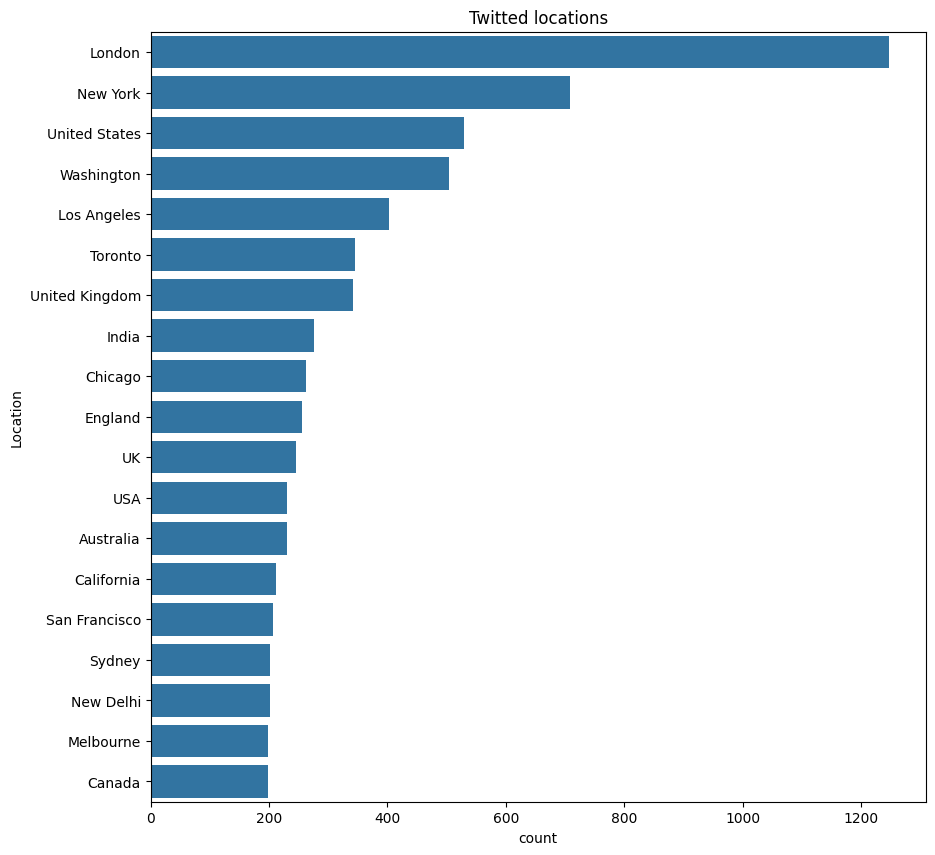

In [12]:
# Display a count plot for the 'Location' column in the 'train' dataset, displaying the top 19 locations by tweet count
plt.figure(figsize=(10,10))
sns.countplot(y='Location',data=train,order=train.Location.value_counts().iloc[0:19].index).set_title("Twitted locations")

<Axes: xlabel='count', ylabel='Sentiment'>

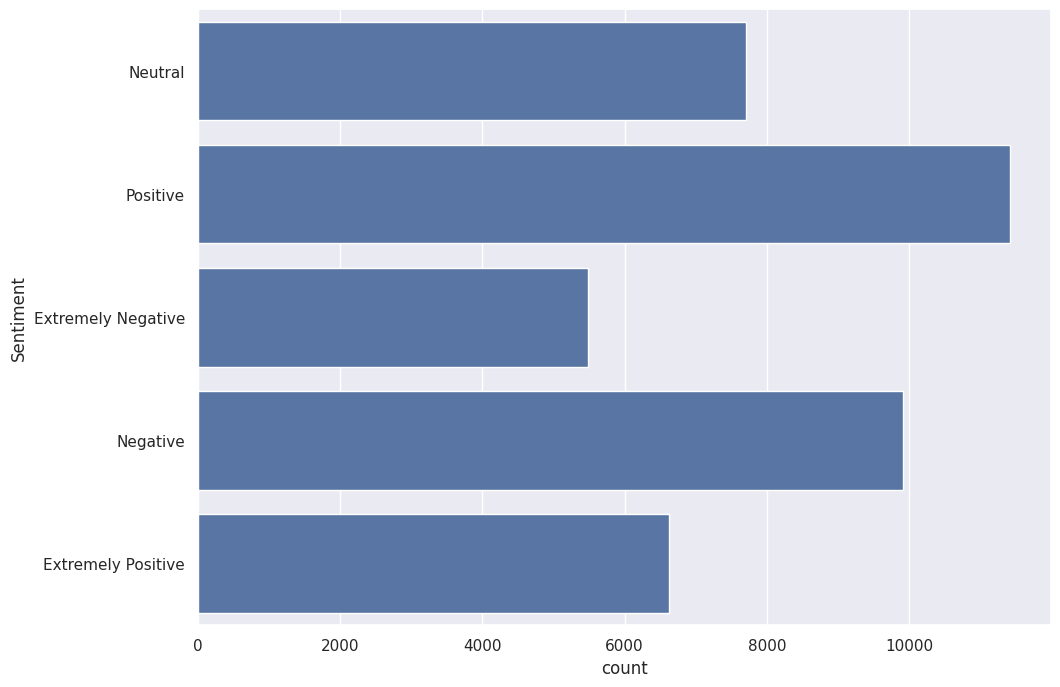

In [14]:
# Display a count plot for the 'Sentiment' column in the 'train' dataset
# This plot will visualize the distribution of different sentiment values within the dataset
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11,8)})
sns.countplot(train['Sentiment'])

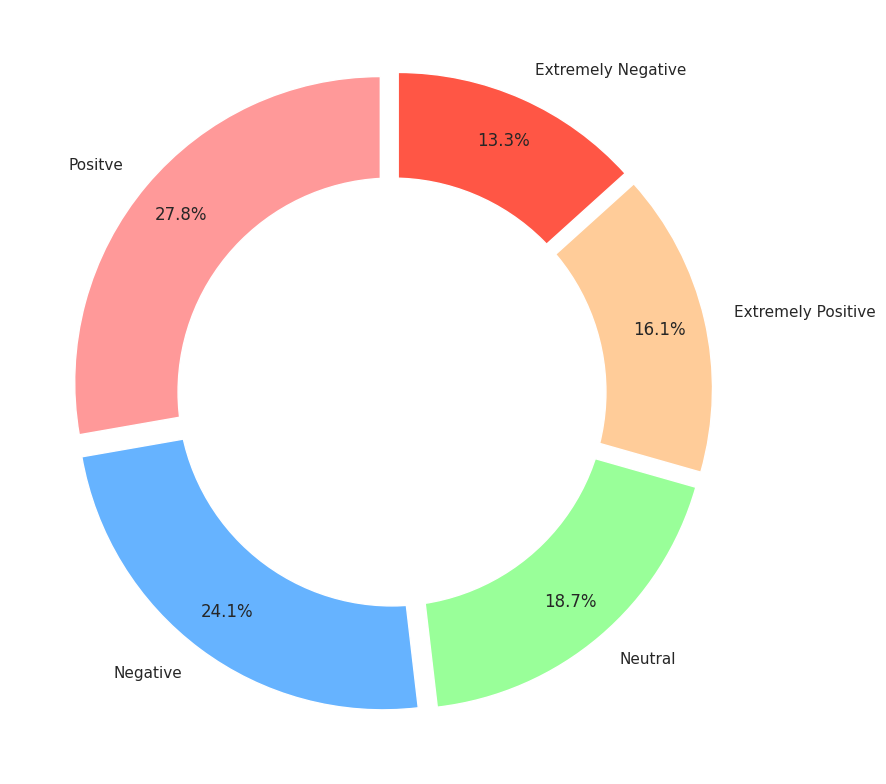

In [15]:
# Display a pie chart of sentiment distribution in the 'train' dataset
# 'autopct' formats the percentage value shown on each pie slice
# 'startangle' rotates the start of the pie chart to 90 degrees
# 'pctdistance' adjusts the distance of the percentage texts from the center
labels = ['Positve', 'Negative', 'Neutral', 'Extremely Positive', 'Extremely Negative']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#ff5645']
explode = (0.05,0.05,0.05,0.05,0.05)
plt.pie(train.Sentiment.value_counts(), colors = colors, labels=labels,
        autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
centreCircle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centreCircle)
plt.tight_layout()
plt.show()

In [16]:
# Example: [:,[2,5]] is the location and sentiment columns
plotDf = train.iloc[:,[2,5]]
plotDf.head()

,Location,Sentiment
0,London,Neutral
1,UK,Positive
2,Vagabonds,Positive
3,NaN,Positive
4,NaN,Extremely Negative


<Axes: title={'center': 'Sentiment Categories of the First 5 Top Locations'}, xlabel='Location', ylabel='count'>

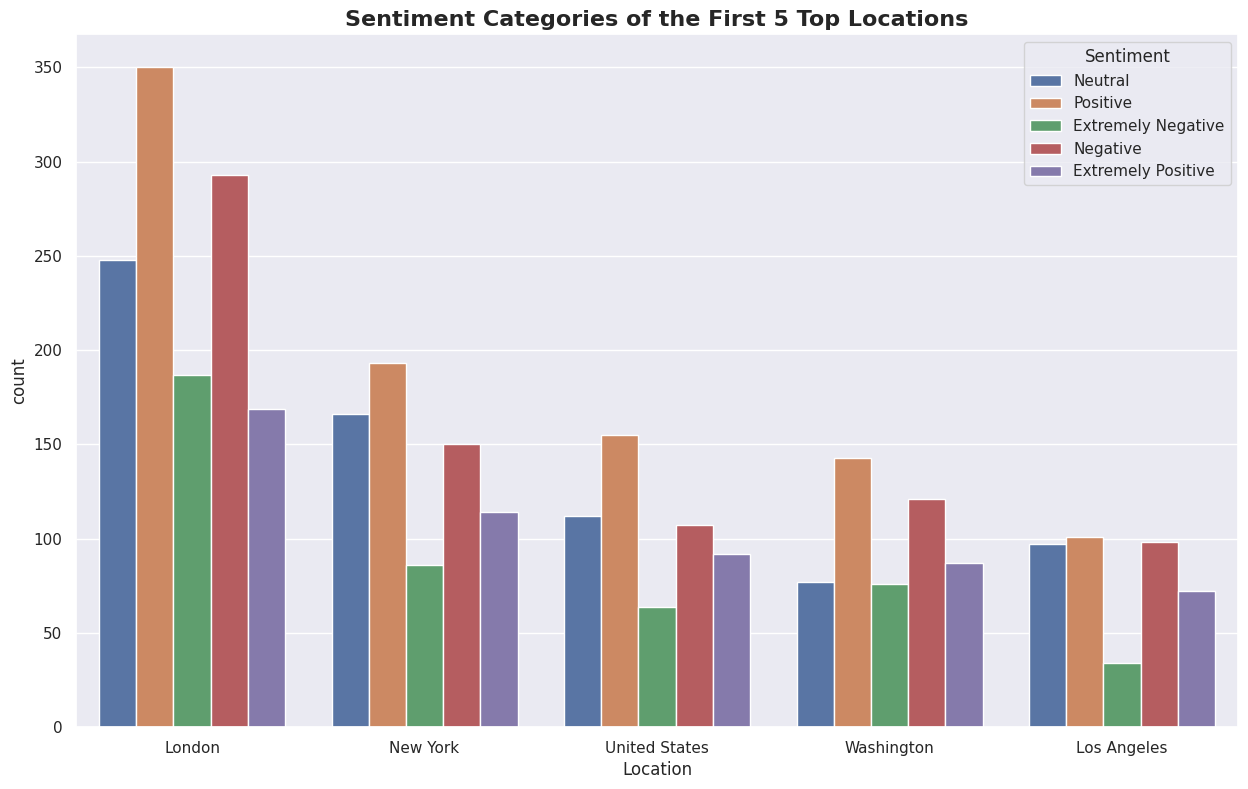

In [17]:
# Reflecting the insight from train['Sentiment'].value_counts(), positive sentiment dominates the
# kind of tweets across the locations.
sns.set(rc={'figure.figsize':(15,9)})
gg = train.Location.value_counts()[:5].index
plt.title('Sentiment Categories of the First 5 Top Locations', fontsize=16, fontweight='bold')
sns.countplot(x = 'Location', hue = 'Sentiment', data = plotDf, order = gg)

In [18]:
# Create a new column 'Identity' in the 'train' and 'test' dataframes. Set its value to 0 for all rows in train df
# and 1 for all rows in test df. Concatenate the 'train' and 'test' dataframes along the rows creating a combined dataframe 'covid'
train['Identity'] = 0
test['Identity'] = 1
covid = pd.concat([train, test])
covid.reset_index(drop=True, inplace=True)
covid.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Identity
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,0
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,0
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,0
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,0


In [19]:
# Replace the 'Sentiment' column values from 'Extremely Positive' to 'Positive'
# and 'Sentiment' column values from 'Extremely Negative' to 'Negative' to simplify sentiment categories
# Drop the 'ScreenName' and 'UserName' column from the 'covid' dataframe, as they're not needed
covid['Sentiment'] = covid['Sentiment'].str.replace('Extremely Positive', 'Positive')
covid['Sentiment'] = covid['Sentiment'].str.replace('Extremely Negative', 'Negative')
covid = covid.drop('ScreenName', axis=1)
covid = covid.drop('UserName', axis=1)
covid.head()

,Location,TweetAt,OriginalTweet,Sentiment,Identity
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0
1,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,0
2,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,0
3,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,0
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,0


<Axes: xlabel='count', ylabel='Sentiment'>

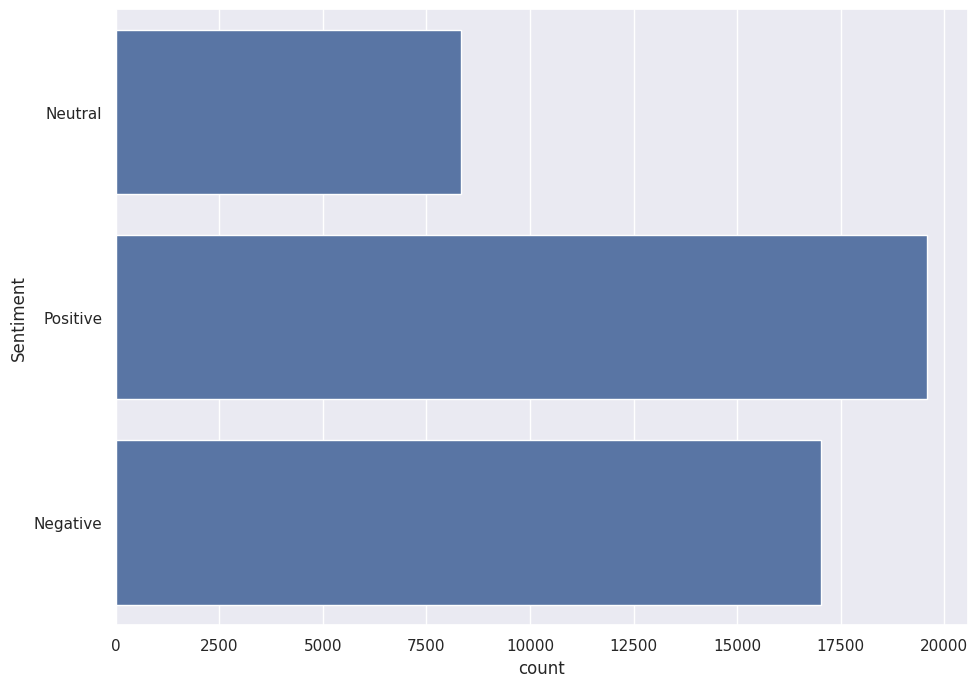

In [20]:
# The blank rows in the Location column would have being filled with Unknown if it would have had any
# significant impact on the objective of the project
# covid['Location'].fillna('Unknown', inplace=True)
# covid.isnull().sum() would have being used to check and confirm
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11,8)})
sns.countplot(covid['Sentiment'])

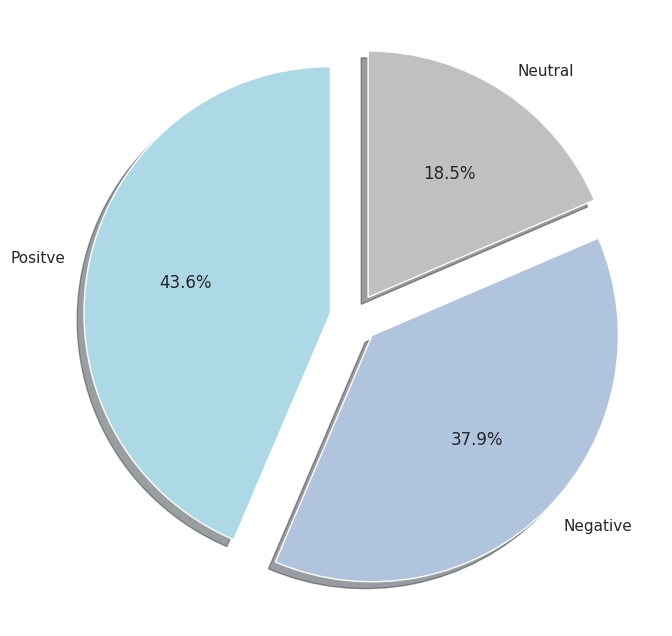

In [21]:
# Show a pie chart of the updated sentiment distribution in the 'covid' dataset with the new labels
labels = ['Positve', 'Negative', 'Neutral']
colors = ['lightblue','lightsteelblue','silver']
explode = (0.1, 0.1, 0.1)
plt.pie(covid.Sentiment.value_counts(), colors = colors, labels=labels,
        shadow=300, autopct='%1.1f%%', startangle=90, explode = explode)
plt.show()

Text(0.5, 1.0, 'Twitted locations')

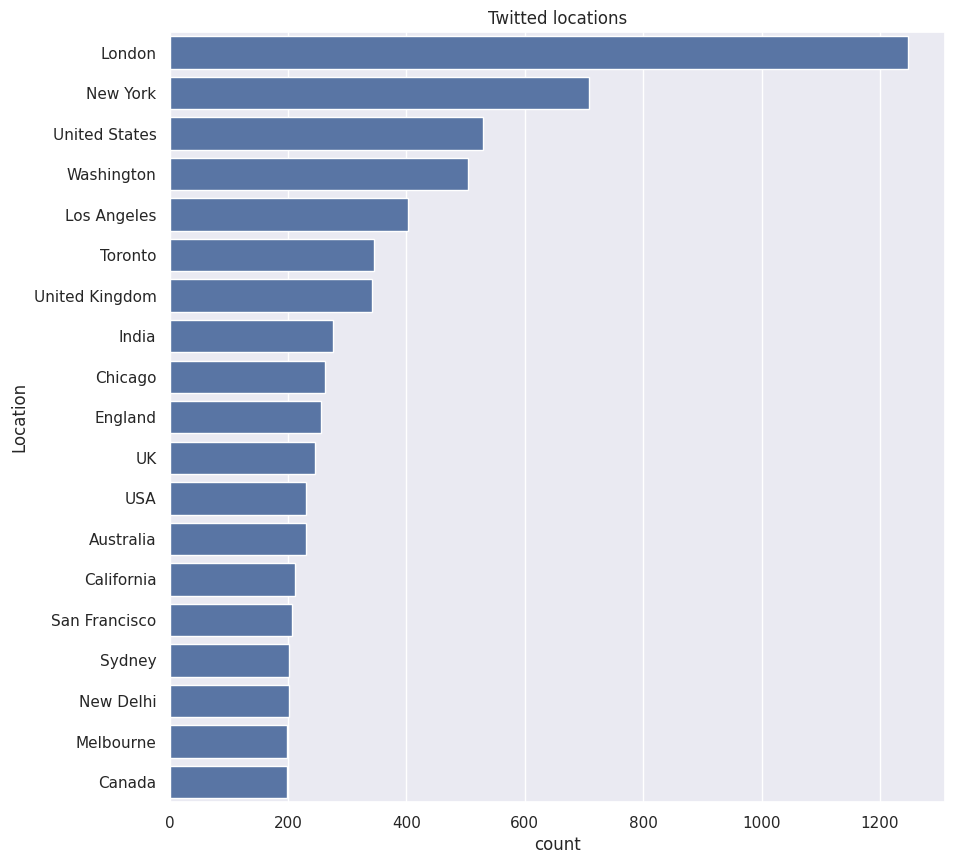

In [22]:
# Display a count plot for the 'Location' column in the 'train' dataset, displaying the top 19 locations by tweet count
plt.figure(figsize=(10,10))
sns.countplot(y='Location',data=train,order=train.Location.value_counts().iloc[0:19].index).set_title("Twitted locations")

In [23]:
# As expected, the bulk of the tweets centres around covid19, it's other generic names, safety
# protocols as well as the different materials needed to weather through the tough times.
covid['Sentiment'] = covid['Sentiment'].map({'Neutral':0, 'Positive':1, 'Negative':2})
hashTags=covid['OriginalTweet'].str.extractall(r"(#\S+)")
hashTags = hashTags[0].value_counts()
hashTags[:50]

0
#coronavirus            13345
#Covid_19                3900
#COVID19                 3470
#Coronavirus             2236
#COVID2019               1772
#toiletpaper             1376
#covid19                 1133
#COVID?19                 893
#CoronaCrisis             720
#CoronaVirus              669
#CoronavirusPandemic      626
#SocialDistancing         615
#covid_19                 477
#CoronavirusOutbreak      442
#pandemic                 410
#panicbuying              403
#CoronaVirusUpdate        341
#lockdown                 340
#Covid19                  336
#StayHomeSaveLives        334
#retail                   329
#coronavirus.             325
#StayAtHome               324
#supermarket              322
#StayHome                 312
#corona                   301
#StopHoarding             275
#socialdistancing         266
#food                     239
#COVID-19                 239
#StopPanicBuying          236
#COVID                    235
#shopping                 228
#covid19

In [24]:
# Extract all occurrences of mentions denoted by @ followed by non-whitespace characters from
# the 'OriginalTweet' column and count the occurrences of each unique mention
mentions = train['OriginalTweet'].str.extractall(r"(@\S+)")
mentions = mentions[0].value_counts()
mentions[:50]

0
@realDonaldTrump    239
@Tesco              180
@sainsburys         152
@BorisJohnson       141
@narendramodi       110
@asda               103
@amazon              95
@PMOIndia            94
@Morrisons           87
@piersmorgan         84
@YouTube             83
@waitrose            70
@CNN                 56
@AldiUK              52
@FTC                 48
@Walmart             47
@CDCgov              44
@NYGovCuomo          42
@BBCNews             41
@SkyNews             40
@LidlGB              38
@nytimes             37
@ssupnow             37
@MailOnline          36
@WSJ                 34
@Coles               33
@McKinsey            33
@10DowningStreet     31
@kroger              31
@WHO                 30
@woolworths          30
@eBay                30
@MattHancock         28
@Target              27
@GMB                 26
@POTUS               26
@GavinNewsom         25
@NHSuk               24
@Canon_India         22
@GoogleNews          22
@Publix              22
@Ocado        

In [26]:
# Import necessary libraries and download stopwords
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#  Preprocess text data removing various elements such as URLs, mentions, hashtags,
# numbers, and HTML tags, and filtering out stopwords
def clean(text):
    text = re.sub(r'http\S+', " ", text)
    text = re.sub(r'@\w+',' ',text)
    text = re.sub(r'#\w+', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub('r<.*?>',' ', text)
    text = text.split()
    text = " ".join([word for word in text if not word in stopWord])

    return text

# Stop words are high-frequency words like a, an, the, to and also that we sometimes want to filter
# out of a document before further processing. Stop words usually have little lexical content and
# do not hold much of a meaning.

# Below is a list of 25 example of semantically non-selective stop words: a, an, and, are, as, at,
# be, by, for, from, has, he, in, is, it, its, of, on, that, the, to, was, were, will, with.
stopWord = stopwords.words('english')

# Apply clean function to each of the original tweets and dsiplay first few rows of cleaned dataset
covid['OriginalTweet'] = covid['OriginalTweet'].apply(lambda x: clean(x))
covid.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Location,TweetAt,OriginalTweet,Sentiment,Identity
0,London,16-03-2020,,0,0
1,UK,16-03-2020,advice Talk neighbours family exchange phone n...,1,0
2,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths give elderly...,1,0
3,NaN,16-03-2020,"My food stock one empty... PLEASE, panic, THER...",1,0
4,NaN,16-03-2020,"Me, ready go supermarket outbreak. Not I'm par...",2,0


In [27]:
# Drop 'Location' and 'TweetAt' columns from dataset
covid = covid[['OriginalTweet','Sentiment','Identity']]
covid.head()

,OriginalTweet,Sentiment,Identity
0,,0,0
1,advice Talk neighbours family exchange phone n...,1,0
2,Coronavirus Australia: Woolworths give elderly...,1,0
3,"My food stock one empty... PLEASE, panic, THER...",1,0
4,"Me, ready go supermarket outbreak. Not I'm par...",2,0


In [29]:
# Import necessary libraries and download necessary packages
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Lemmatization is the algorithmic process of determining the lemma of a word based on its intended
# meaning. For example, in English, the verb “to walk” may appear as “walk,” “walked,” “walks,” or
# “walking.” The base form, “walk,” that one might look up in a dictionary, is called the lemma for
# the word.

# Tokenization is one of the simple yet basic concepts of natural language processing where texts are
# splitted into meaningful segments.

# Data vectorization deals with the turning of data into tensors. All inputs and targets in a machine
# learning model must be tensors of floating-point data (or, in specific cases, tensors of integers).
# Tokenize and Lemmatize the dataset and show the first few rows of processed dataset
covid['Corpus'] = [nltk.word_tokenize(text) for text in covid.OriginalTweet]
lemma = nltk.WordNetLemmatizer()
covid.Corpus = covid.apply(lambda x: [lemma.lemmatize(word) for word in x.Corpus], axis=1)
covid.Corpus = covid.apply(lambda x: " ".join(x.Corpus),axis=1)
covid.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,OriginalTweet,Sentiment,Identity,Corpus
0,,0,0,
1,advice Talk neighbours family exchange phone n...,1,0,advice Talk neighbour family exchange phone nu...
2,Coronavirus Australia: Woolworths give elderly...,1,0,Coronavirus Australia : Woolworths give elderl...
3,"My food stock one empty... PLEASE, panic, THER...",1,0,"My food stock one empty ... PLEASE , panic , T..."
4,"Me, ready go supermarket outbreak. Not I'm par...",2,0,"Me , ready go supermarket outbreak . Not I 'm ..."


In [30]:
# Split the dataframe back into train and test sets based on the 'Identity' column.
# Rows with 'Identity' == 0 are part of the training set, and rows with 'Identity' == 1 are part of the test set
train = covid[covid.Identity==0]
test = covid[covid.Identity==1]
train.drop('Identity',axis=1, inplace=True)
test.drop('Identity',axis=1, inplace=True)
test.reset_index(drop=True,inplace=True)
# Show first few rows or training dataset
train.head()

<ipython-input-30-fe3eebb5e2c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('Identity',axis=1, inplace=True)
<ipython-input-30-fe3eebb5e2c0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('Identity',axis=1, inplace=True)


,OriginalTweet,Sentiment,Corpus
0,,0,
1,advice Talk neighbours family exchange phone n...,1,advice Talk neighbour family exchange phone nu...
2,Coronavirus Australia: Woolworths give elderly...,1,Coronavirus Australia : Woolworths give elderl...
3,"My food stock one empty... PLEASE, panic, THER...",1,"My food stock one empty ... PLEASE , panic , T..."
4,"Me, ready go supermarket outbreak. Not I'm par...",2,"Me , ready go supermarket outbreak . Not I 'm ..."


In [31]:
# Show first few rows or testing dataset
test.head()

,OriginalTweet,Sentiment,Corpus
0,TRENDING: New Yorkers encounter empty supermar...,2,TRENDING : New Yorkers encounter empty superma...
1,"When I find hand sanitizer Fred Meyer, I turne...",1,"When I find hand sanitizer Fred Meyer , I turn..."
2,Find protect loved ones . ?,1,Find protect loved one . ?
3,buying hits City anxious shoppers stock food&a...,2,buying hit City anxious shopper stock food & a...
4,One week everyone buying baby milk powder next...,0,One week everyone buying baby milk powder next...


In [32]:
# Identify predictor and target columns in training and test set
XTrain = train.Corpus
yTrain = train.Sentiment
XTest = test.Corpus
yTest = test.Sentiment

# Split the training data further into a smaller training set and a validation set and display
# number of samples in each set
XTrain, XVal, yTrain, yVal = train_test_split(XTrain, yTrain, test_size=0.2,random_state=42)
XTrain.shape, XVal.shape, yTrain.shape, yVal.shape, XTest.shape, yTest.shape

((32925,), (8232,), (32925,), (8232,), (3798,), (3798,))

In [33]:
# Creates a CountVectorizer and fit it to the entire corpus for the feature extraction process
vectorizer = CountVectorizer(stop_words='english',ngram_range=(1,2),min_df=5).fit(covid.Corpus)

# Transform the training, validation and test text data into a sparse matrix of token counts
# using the vocabulary learned during fitting
XTrainVec = vectorizer.transform(XTrain)
XValVec = vectorizer.transform(XVal)
XTestVec = vectorizer.transform(XTest)

# Logistic Regression (also called Logit Regression) is commonly used to estimate the probability
# that an instance belongs to a particular class (e.g., what is the probability that this email is
# spam?). If the estimated probability is greater than 50%, then the model predicts that the instance
# belongs to that class (called the positive class, labeled “1”), or else it predicts that it does
# not (i.e., it belongs to the negative class, labeled “0”).

# A Logistic Regression model computes a weighted sum of the input features (plus a bias term), but
# instead of outputting the result directly like the Linear Regression model does, it outputs the
# logistic of this result.
# p = hθ x = σ xTθ
# The logistic—noted σ(·)—is a sigmoid function (i.e., S-shaped) that outputs a number
# between 0 and 1.
logReg = LogisticRegression(random_state=42)

# Cross-validation makes it possible to get not only an estimate of the performance of models,
# but also a measure of how precise this estimate is (i.e., its standard deviation). But cross-
# validation comes at the cost of training models several times, so it is not always possible.
cross_val_score(LogisticRegression(random_state=42),
                XTrainVec, yTrain, cv=10, verbose=1, n_jobs=-1).mean()

# Fit the model to the vectorized training data and display model performance
model = logReg.fit(XTrainVec, yTrain)
print(classification_report(yVal, model.predict(XValVec)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   20.1s finished


              precision    recall  f1-score   support

           0       0.70      0.73      0.71      1553
           1       0.83      0.84      0.83      3617
           2       0.82      0.79      0.80      3062

    accuracy                           0.80      8232
   macro avg       0.78      0.79      0.78      8232
weighted avg       0.80      0.80      0.80      8232



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fine Tuning the Logistic Regression Model

A great way to do this is by 'Grid Searching' which involves the fiddling with the hyperparameters until a great combination of hyperparameter values is discovered. It can be done simply by using Scikit-Learn’s GridSearchCV. All that's needed is tell it which hyperparameters you want it to experiment with, and what values to try out, and it will evaluate all the possible combinations of hyperparameter values, using cross-validation.


In [34]:
# L2 regularization is a method to prevent overfitting by penalizing large coefficients
penalty = ['l2']
# Generates 10 logarithmically spaced values between 10⁰ and 10⁴ for the regularization strength C.
# C is the inverse of regularization strength
C = np.logspace(0, 4, 10)
# Combines the C values and the penalty type into a dictionary to define the grid of hyperparameters that gid search will search over
hyperparameters = dict(C=C, penalty=penalty)
# Initializes a GridSearchCV with the logistic regression
logRegGrid = GridSearchCV(logReg, hyperparameters, cv=5, verbose=0)
# Evaluate a logistic regression model for each combination of hyperparameters in the grid
bestModel = logRegGrid.fit(XTrainVec, yTrain)

# Best hyperparameters combination
print('Best Penalty:', bestModel.best_estimator_.get_params()['penalty'])
print('Best C:', bestModel.best_estimator_.get_params()['C'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Penalty: l2
Best C: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
# Final Logistic Regression model performance based on best model parameters
# Best Penalty: l2
# Best C: 1.0
# Predict the sentiment labels for the vectorized test data and
# display the performance
yPred = bestModel.predict(XTestVec)
print(classification_report(yTest, bestModel.predict(XTestVec)))

# Precision deals with the accuracy of the positive predictions.
# precision = TP / TP + FP
# TP is the number of true positives, and FP is the number of false positives.

# Recall, also called sensitivity or true positive rate (TPR) is the ratio of positive instances that
# are correctly detected by the classifier.
# recall = TP / TP + FN
# TP is the number of true positives FP is the number of false positives and FN is the number of
# false negatives.

# But the metric of choice to measure the performance of the logistic regression model in this
# project is the F1-score.The F1 score is the harmonic mean of precision and recall.
# Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low
# values. As a result, the classifier will only get a high F1 score if both recall and precision are
# high.

# A less concise metric also available is the confusion matrix. The general idea involves counting
# the number of times instances of class A are classified as class B.

#  Implementation:

# from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import cross_val_predict

# yPred = bestModel.predict(XTestVec)
# print(confusion_matrix(yTest, yPred))

# NB: it's possible that classification metrics wont't be able to handle a mix of multilabel-indicator
# and multiclass targets.

              precision    recall  f1-score   support

           0       0.64      0.64      0.64       619
           1       0.78      0.80      0.79      1546
           2       0.80      0.78      0.79      1633

    accuracy                           0.77      3798
   macro avg       0.74      0.74      0.74      3798
weighted avg       0.77      0.77      0.77      3798



1. Input parameters of the function
 CountVectorizer(stop_words='english',ngram_range=(1,2),min_df=5):
 stop_words='english': exclude common English words (the, and, is, are) that don't contribute significant meaning for analysis  
 ngram_range=(1,2): Use both single words and bigrams as predictors  
 min_df=5: Include only those predictors that appear in at least 5 samples to help eliminate rare predictors.

2. Output of the CountVectorizer() function: Is a matrix of token counts which is a sparse representation of the counts meaning each row corresponding to a sample will contain mostly 0s except for the a few 1s identifying which predictors (words and bigrams) were in that sample.
